In [16]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("vishnuvarthanrao/petrol-prices")

print("Dataset directory:", path)

files = os.listdir(path)

print("Files in the dataset directory:", files)

csv_file = [f for f in files if f.endswith('.csv')][0]  # Find the first CSV file

# Create the full path to the CSV file
csv_file_path = os.path.join(path, csv_file)

# Now, read the CSV file
data = pd.read_csv(csv_file_path)
print(data.head())


Dataset directory: /root/.cache/kagglehub/datasets/vishnuvarthanrao/petrol-prices/versions/1
Files in the dataset directory: ['petrol.csv']
            Date  Delhi  Kolkata  Mumbai  Chennai
0  April 19 2018  74.07    76.77   81.92    76.84
1  April 18 2018  74.02    76.73   81.87    76.79
2  April 17 2018  74.02    76.73   81.87    76.79
3  April 16 2018  74.02    76.73   81.87    76.79
4  April 15 2018  73.98    76.69   81.83    76.75


In [17]:
data

,Date,Delhi,Kolkata,Mumbai,Chennai
0,April 19 2018,74.07,76.77,81.92,76.84
1,April 18 2018,74.02,76.73,81.87,76.79
2,April 17 2018,74.02,76.73,81.87,76.79
3,April 16 2018,74.02,76.73,81.87,76.79
4,April 15 2018,73.98,76.69,81.83,76.75
...,...,...,...,...,...
369,August 01 2014,72.51,80.30,80.60,75.78
370,July 01 2014,73.60,81.43,81.75,76.93
371,June 25 2014,71.56,79.42,80.16,74.76
372,June 07 2014,71.51,79.36,80.11,74.71


In [18]:
# Convert 'Date' column to datetime for better time series handling
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data

,Date,Delhi,Kolkata,Mumbai,Chennai
0,2018-04-19,74.07,76.77,81.92,76.84
1,2018-04-18,74.02,76.73,81.87,76.79
2,2018-04-17,74.02,76.73,81.87,76.79
3,2018-04-16,74.02,76.73,81.87,76.79
4,2018-04-15,73.98,76.69,81.83,76.75
...,...,...,...,...,...
369,2014-08-01,72.51,80.30,80.60,75.78
370,2014-07-01,73.60,81.43,81.75,76.93
371,2014-06-25,71.56,79.42,80.16,74.76
372,2014-06-07,71.51,79.36,80.11,74.71


In [19]:
# Convert 'Date' column to datetime for better time series handling
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [23]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
Date,0
Delhi,0
Kolkata,0
Mumbai,0
Chennai,0


In [26]:
missing_dates = data["Date"].isna().sum()
missing_dates

0

In [33]:
# Add a feature for average petrol price across all cities
data['Average_Price'] = data[['Delhi', 'Kolkata', 'Mumbai', 'Chennai']].mean(axis=1)
data['Average_Price']

,Average_Price
0,77.4000
1,77.3525
2,77.3525
3,77.3525
4,77.3125
...,...
369,77.2975
370,78.4275
371,76.4750
372,76.4225


In [35]:
# Drop rows with missing dates (if any) after conversion
data = data.dropna(subset=['Date'])

data

,Date,Delhi,Kolkata,Mumbai,Chennai,Average_Price
0,2018-04-19,74.07,76.77,81.92,76.84,77.4000
1,2018-04-18,74.02,76.73,81.87,76.79,77.3525
2,2018-04-17,74.02,76.73,81.87,76.79,77.3525
3,2018-04-16,74.02,76.73,81.87,76.79,77.3525
4,2018-04-15,73.98,76.69,81.83,76.75,77.3125
...,...,...,...,...,...,...
369,2014-08-01,72.51,80.30,80.60,75.78,77.2975
370,2014-07-01,73.60,81.43,81.75,76.93,78.4275
371,2014-06-25,71.56,79.42,80.16,74.76,76.4750
372,2014-06-07,71.51,79.36,80.11,74.71,76.4225


In [37]:
# Re-check missing values after preprocessing
final_missing_values = data.isnull().sum()
final_missing_values

,0
Date,0
Delhi,0
Kolkata,0
Mumbai,0
Chennai,0
Average_Price,0


In [38]:
final_missing_values

,0
Date,0
Delhi,0
Kolkata,0
Mumbai,0
Chennai,0
Average_Price,0


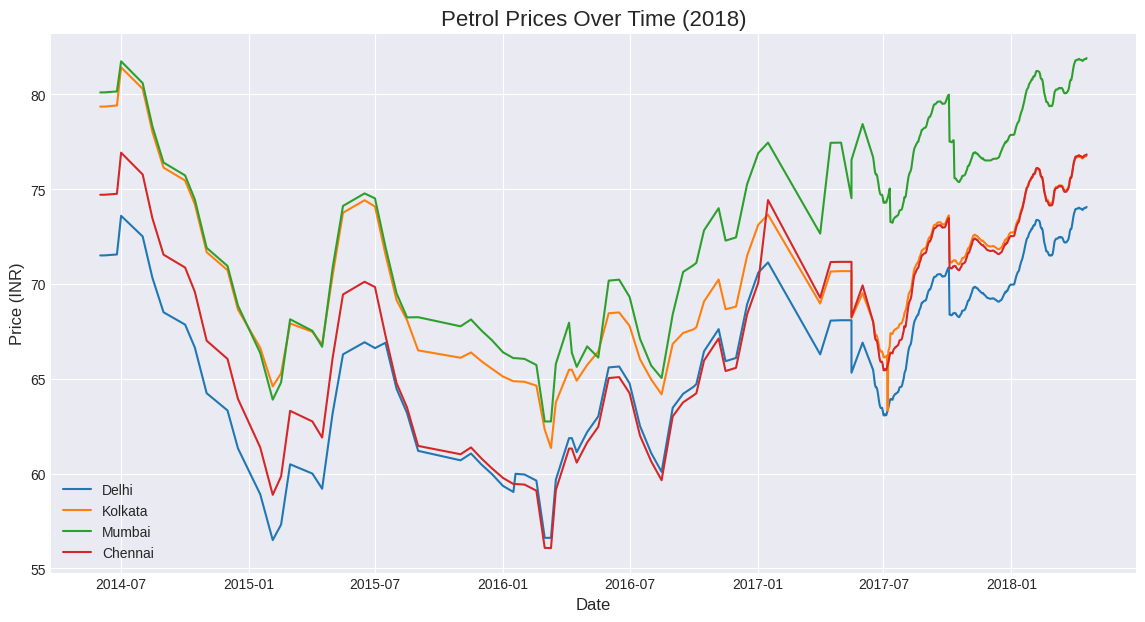

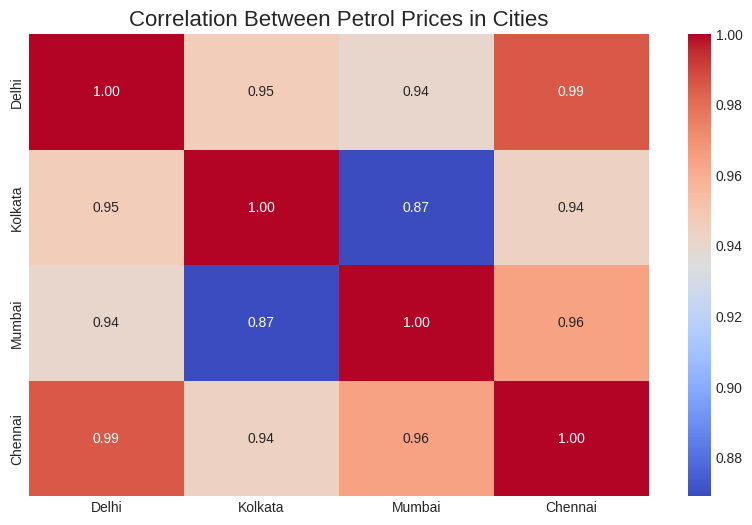

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')  # Corrected the style name

# Plot petrol prices over time for each city
plt.figure(figsize=(14, 7))
for city in ['Delhi', 'Kolkata', 'Mumbai', 'Chennai']:
    plt.plot(data['Date'], data[city], label=city)

plt.title('Petrol Prices Over Time (2018)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.legend()
plt.show()

# Correlation heatmap between cities
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Delhi', 'Kolkata', 'Mumbai', 'Chennai']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Petrol Prices in Cities', fontsize=16)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['Delhi', 'Kolkata', 'Mumbai', 'Chennai']]
y = data['Average_Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((299, 4), (75, 4), (299,), (75,))

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Linear Regression - MAE:", lr_mae, "MSE:", lr_mse, "R²:", lr_r2)
print("Random Forest - MAE:", rf_mae, "MSE:", rf_mse, "R²:", rf_r2)


Linear Regression - MAE: 1.2979247306551163e-14 MSE: 2.308943278854887e-28 R²: 1.0
Random Forest - MAE: 0.07130933333333105 MSE: 0.0330704486833366 R²: 0.9978512577850963


In [47]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [49]:
# Predict future prices
new_data = pd.DataFrame({
    'Delhi': [90.5],
    'Kolkata': [91.7],
    'Mumbai': [92.3],
    'Chennai': [91.9]
})

new_data

,Delhi,Kolkata,Mumbai,Chennai
0,90.5,91.7,92.3,91.9


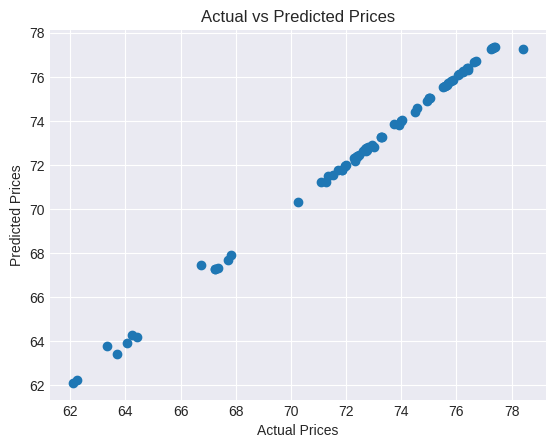

In [50]:

future_predictions = rf_model.predict(new_data)  # Replace 'new_data' with actual features for prediction

# Plot predictions vs actual
import matplotlib.pyplot as plt
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
